In [84]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

import spacy
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import scipy.stats as st

[nltk_data] Downloading package stopwords to /Users/Sanna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
# containing descriptions of columns
with open('meta_dict.json', 'r') as f: # descriptions of columns
    meta_dict = json.load(f)
print(len(meta_dict))

52


In [163]:
ROOT = Path('/Volumes/INWT/Daten_NLP/') # encrypted folder!
DATA = ROOT / '200707_aachener_zeitung_modified.csv' # text is already minimal preprocessed

In [164]:
df_raw = pd.read_csv(DATA, index_col = 0)
df_raw.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,...,titelH3,wordcount,category,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,avgTimeOnPage/wordcount
articleId,,,,,,,,,,,,,,,,,,,,,
48620281,21,7,12,7,1012,NaN,112.444444,42.857143,33.333333,33.333333,...,NaN,769,vm,München/Stuttgart,Frische Luft und Bewegung: Diese Kombination r...,796,5.359296,29,9,0.146222
48620381,19,6,11,5,1484,NaN,185.500000,42.105263,31.578947,26.315789,...,NaN,441,vm,Berlin/Frankfurt/Main,"Der Wecker klingelt, aufstehen! Doch gerade im...",452,5.938053,33,8,0.420635
48622639,2,2,2,2,0,NaN,0.000000,0.000000,100.000000,100.000000,...,NaN,390,vm,Berlin,Eltern auf der Suche nach einem guten Babyphon...,396,5.848485,30,7,0.000000
48623085,32,9,20,9,974,NaN,81.166667,37.500000,28.125000,28.125000,...,NaN,345,vm,Berlin,Spülmaschinentabs sollen kleine Alleskönner se...,367,5.594005,30,7,0.235266
48623259,24,2,7,2,3797,NaN,223.352941,70.833333,8.333333,8.333333,...,NaN,182,vm,Berlin,Make-up hat heutzutage einen Zweck: Es soll da...,183,5.622951,22,8,1.227214


In [165]:
df_raw = df_raw.fillna('') # replacing Nan with emtpy string
#df_raw.info()

In [166]:
#df_raw.loc[49200513]

In [167]:
df_raw.loc[49200513, 'text_preprocessed'] # one example

'Die neuen Fälle von Ansteckungen mit dem Coronavirus Sars-CoV-2 haben zum Teil Konsequenzen für öffentliche Einrichtungen. In Nordrhein-Westfalen sind als Vorsichtsmaßnahme gegen die Krankheit Covid-19 einzelne Kindergärten und Schulen geschlossen, auf Teneriffa sitzen Urlauber in einem Hotel fest. Was gilt für Arbeitgeber in solchen Situationen - und was sollten Beschäftigte noch dazu wissen? Fall 1: Die Kita oder Schule bleibt geschlossen Wenn Kindergärten und Schulen aus Vorsicht zum Infektionsschutz geschlossen sind, können Arbeitnehmer im Notfall zu Hause bleiben, um ihre Kinder zu betreuen, erklärt Nathalie Oberthür, Fachanwältin für Arbeitsrecht aus Köln. Ob sie dann auch weiter ihr Gehalt bekommen, hängt aber davon ab, ob wirklich keine andere Betreuung möglich war. Paragraf 616 im Bürgerlichen Gesetzbuch (BGB) besagt, dass, wer ohne eigenes Verschulden und aus einem persönlichen Grund verhindert ist und nicht zur Arbeit kommen kann, trotzdem weiter Gehalt bekommt. Die erste M

In [168]:
df_raw.loc[49200513, 'teaser'] # one example

"Die Ausbreitung des neuen Coronavirus' hat zum Teil Konsequenzen, die auch Arbeitnehmer betreffen können. Was gilt, wenn Kitas geschlossen bleiben oder Urlauber erstmal nicht nach Hause reisen dürfen?"

In [169]:
df_raw.loc[49200513, 'titelH1'] # one example

'Einschränkungen wegen Covid-19: Was Arbeitnehmer wissen müssen'

In [170]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 48620281 to 51565349
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pageviews                891 non-null    int64  
 1   entrances                891 non-null    int64  
 2   exits                    891 non-null    int64  
 3   bounces                  891 non-null    int64  
 4   timeOnPage               891 non-null    int64  
 5   conversions              891 non-null    object 
 6   avgTimeOnPage            891 non-null    float64
 7   stickiness               891 non-null    float64
 8   entranceRate             891 non-null    float64
 9   bounceRate               891 non-null    float64
 10  kategorie                891 non-null    object 
 11  rubrik                   891 non-null    object 
 12  subRubrik                891 non-null    object 
 13  titel                    891 non-null    object 
 14  pagePath      

In [237]:
#df_raw.sort_values(by='pageviews', ascending=False)
#df_raw.sort_values(by='timeOnPage', ascending=False)
#df_raw.sort_values(by='avgTimeOnPage', ascending=False)
#df_raw.sort_values(by='stickiness', ascending=False)
df_raw.sort_values(by='avgTimeOnPage/wordcount', ascending=False)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,...,titelH3,wordcount,category,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,avgTimeOnPage/wordcount
articleId,,,,,,,,,,,,,,,,,,,,,
51076807,2,2,1,1,1490,,1490.000000,50.000000,100.000000,50.000000,...,,220,vm,Stuttgart,Damit Kinder den Schulbus sicher nutzen können...,217,5.672811,27,6,6.772727
50484927,2,0,0,0,1762,,881.000000,100.000000,0.000000,0.000000,...,,156,vm,Hamburg,Trotz Corona-Krise darf es Eltern nicht unters...,153,6.803922,30,8,5.647436
49320131,8,3,5,2,2123,,707.666667,37.500000,37.500000,25.000000,...,,148,vm,Hamburg,Das Trockenwerden ist für Eltern ein hochemoti...,149,5.187919,31,8,4.781532
49439573,9,8,7,6,1444,,722.000000,22.222222,88.888889,66.666667,...,,163,vm,Berlin,"Welchem Hobby ein Mieter nachgeht, muss Vermie...",160,6.068750,0,7,4.429448
49447665,9,6,7,6,854,,427.000000,22.222222,66.666667,66.666667,...,,115,vm,Kampala/Berlin,Wegen des neuartigen Coronavirus belegt Uganda...,113,6.115044,22,8,3.713043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49077665,2,1,2,1,0,,0.000000,0.000000,50.000000,50.000000,...,,111,vm,Bonn,"Ist ein Knollensellerie angeschnitten, hält er...",107,5.794393,25,6,0.000000
49731085,4,1,4,1,0,,0.000000,0.000000,25.000000,25.000000,...,,412,vm,Berlin/Kiel,Kleine Kinder dürfen nicht mehr auf die Spielp...,422,5.853081,28,9,0.000000
48960795,3,1,3,1,0,,0.000000,0.000000,33.333333,33.333333,...,,307,vm,Kehl,"Ein Zimmer in Paris oder am Gardasee, ein Feri...",301,6.162791,28,11,0.000000


## Modeling pageviews / avgTimeOnPage with (lemmatized) Bag-of-Words (Ridge Regression)

In [264]:
# just take articles where ...
#df = df_raw.loc[(df_raw['pageviews'] >= 5)]

df = df_raw.loc[(df_raw['pageviews'] >= 5) &
                (df_raw['avgTimeOnPage/wordcount'] <= 5) &
                (df_raw['avgTimeOnPage/wordcount'] >= 0.1)]

print(len(df))

667


In [265]:
#creating train, dev, test
RANDOM_SEED = 123
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)
df_dev, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED, shuffle=True)
print(df_train.shape, df_dev.shape, df_test.shape)

(533, 35) (67, 35) (67, 35)


In [266]:
# lemmatizes (punctuation stays in, but the default tokenizer from Count_Vectorizer seems to delete it)
class Preprocessor():
    def __init__(self):
        self.nlp = spacy.load("de_core_news_sm", disable=['parser', 'ner'])
        #self.nlp = spacy.load("de_core_news_md", disable=['parser', 'ner'])

    def __call__(self, doc):
        rt = []
        doc = self.nlp(doc)
        for token in doc:
            rt.append(token.lemma_.lower()) # stopwords stay in, but CountVectorizer uses nltk-list later

        return " ".join(rt)

In [267]:
preprocessor = Preprocessor()
stopwords = nltk.corpus.stopwords.words('german')
print(stopwords[:10])
print(len(stopwords))
stopwords = [ preprocessor(s) for s in stopwords ]
print(stopwords[:10])
print(len(stopwords))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']
232
['aber', 'all', 'alle', 'alle', 'all', 'alle', 'als', 'also', 'am', 'an']
232


In [268]:
preprocessor = Preprocessor()
vectorizer = CountVectorizer(analyzer='word',
                             preprocessor=preprocessor,
                             ngram_range=(1, 5),
                             min_df=3, # Achtung: vielleicht je nach Textbasis anpassen?
                             max_features=10000,
                             stop_words=stopwords
                            )

In [269]:
# define text base features: text_preprocessed? titelH1? teaser?

feature = 'text_preprocessed'
#feature = 'titelH1'
#feature = 'teaser' # note: not all have 'teaser' but I replaced Nan wih empty string ""

X_train = vectorizer.fit_transform(df_train[feature])

In [270]:
vectorizer.get_feature_names()[300:320] # just some n-grams

['achtsamkeit',
 'achtung',
 'adac',
 'adac auto',
 'adac schreiben',
 'adac schreiben blick',
 'adfc',
 'adresse',
 'agb',
 'agentur',
 'aggressiv',
 'agieren',
 'aida',
 'aida cruises',
 'airline',
 'akku',
 'aktion',
 'aktion gesunder',
 'aktion gesunder rücken',
 'aktiv']

In [271]:
X_dev = vectorizer.transform(df_dev[feature])
X_test = vectorizer.transform(df_test[feature])

In [272]:
X_train, X_dev, X_test = X_train.toarray(), X_dev.toarray(), X_test.toarray()

In [273]:
X_train.shape, X_dev.shape, X_test.shape

((533, 6636), (67, 6636), (67, 6636))

In [274]:
# define the target labels
#target = 'timeOnPage'
#target =  'pageviews'
#target = 'avgTimeOnPage'
#target = 'stickiness'
target = 'avgTimeOnPage/wordcount'



y_train = np.array(df_train[target])
y_dev = np.array(df_dev[target])
y_test = np.array(df_test[target])

In [275]:
y_train.shape, y_dev.shape, y_test.shape

((533,), (67,), (67,))

In [276]:
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor

In [277]:
# choose model ???
model = Ridge()
#model = LinearRegression()
#model = SGDRegressor()

In [278]:
model.fit(X_train, y_train)

Ridge()

In [279]:
# predict for dev set
pred_dev = model.predict(X_dev)

In [280]:
pred_dev

array([ 0.1814838 ,  0.16065971,  0.72723853,  0.65355604,  0.67966261,
        0.42267607,  0.37243972,  1.00475702,  0.53937739,  0.42804412,
        0.90261311,  0.41600586,  0.62169009,  0.52020452,  0.61585568,
       -0.45877548,  0.13105782,  0.64227013,  1.54571123, -0.00233556,
        0.48615515,  0.56231171,  0.93091817,  0.12381347, -0.09593403,
        0.53247232, -0.353772  ,  0.69069513,  1.16800039,  0.99029984,
        0.4266205 ,  0.83322581,  0.55754194,  0.38175533,  0.32456856,
        0.21657928,  1.04155012,  0.88351833, -0.74157591, -0.14017335,
       -0.27211029,  0.74805474,  0.49850178,  0.50939963,  0.46613654,
        0.49190981,  0.4890849 ,  1.03056907,  1.07907241,  0.11326759,
        0.33624202,  0.13094932,  0.15604366,  0.80697487,  0.29881475,
        0.65725011,  0.8029418 ,  0.79792812,  0.88470618,  0.47678053,
        1.11990425,  0.48296645,  0.47656559,  0.50435288,  0.35755033,
        0.70885346, -0.16546476])

In [281]:
# postprocessing: replace negative values with 0 (better way? can I give that hint to the model?)
pred_dev[pred_dev < 0] = 0

In [282]:
pred_dev

array([0.1814838 , 0.16065971, 0.72723853, 0.65355604, 0.67966261,
       0.42267607, 0.37243972, 1.00475702, 0.53937739, 0.42804412,
       0.90261311, 0.41600586, 0.62169009, 0.52020452, 0.61585568,
       0.        , 0.13105782, 0.64227013, 1.54571123, 0.        ,
       0.48615515, 0.56231171, 0.93091817, 0.12381347, 0.        ,
       0.53247232, 0.        , 0.69069513, 1.16800039, 0.99029984,
       0.4266205 , 0.83322581, 0.55754194, 0.38175533, 0.32456856,
       0.21657928, 1.04155012, 0.88351833, 0.        , 0.        ,
       0.        , 0.74805474, 0.49850178, 0.50939963, 0.46613654,
       0.49190981, 0.4890849 , 1.03056907, 1.07907241, 0.11326759,
       0.33624202, 0.13094932, 0.15604366, 0.80697487, 0.29881475,
       0.65725011, 0.8029418 , 0.79792812, 0.88470618, 0.47678053,
       1.11990425, 0.48296645, 0.47656559, 0.50435288, 0.35755033,
       0.70885346, 0.        ])

In [283]:
np.array(y_dev)

array([0.69067797, 0.25331295, 0.82068452, 0.5       , 0.13282937,
       0.33907285, 0.26507277, 0.43358876, 0.38773946, 0.27446184,
       0.36848485, 0.24201389, 0.19272727, 0.37371134, 0.42442442,
       0.42494824, 0.32155797, 0.30382294, 0.10789474, 0.84555985,
       0.5754386 , 0.25523013, 0.18961864, 0.28008386, 0.47386667,
       0.48589065, 0.11523438, 0.18805195, 0.30257937, 0.12384717,
       0.31349782, 0.1348    , 0.2433287 , 2.67127496, 0.43116371,
       0.1902834 , 0.74691358, 0.40659341, 0.39184696, 1.10586481,
       0.25092937, 0.59970567, 0.48850727, 0.47482639, 0.11051693,
       0.40310078, 0.28074141, 0.71324801, 0.33062771, 0.2122281 ,
       0.44900498, 0.20930233, 0.27622135, 0.58514493, 0.33166667,
       0.44862155, 0.36098131, 0.30051743, 0.46178093, 4.42944785,
       0.17183099, 0.69140625, 0.70605442, 0.66248257, 0.70205479,
       0.13276836, 0.17809524])

In [284]:
st.pearsonr(pred_dev, y_dev)

(-0.07362415421626392, 0.5537815643554699)

In [225]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [226]:
mean_squared_error(pred_dev, y_dev) #, squared=False) # hard to interpret

0.3134828615672699

In [227]:
mean_absolute_error(pred_dev, y_dev) # hard to interpret

0.34742851194311175

In [228]:
explained_variance_score(pred_dev, y_dev) # what does this number mean? ... (1.0 is best)

-1.4613819476224785

In [229]:
df_dev.iloc[4] # Example where timeOnPage = 0 (boring article! :D)

pageviews                                                                 10
entrances                                                                  0
exits                                                                      2
bounces                                                                    0
timeOnPage                                                               438
conversions                                                                 
avgTimeOnPage                                                          54.75
stickiness                                                                80
entranceRate                                                               0
bounceRate                                                                 0
kategorie                                                           ratgeber
rubrik                                                          bauen-wohnen
subRubrik                                                                   

In [230]:
#vectorizer.stop_words_ # shows not used features (in too many/little documents)
#vectorizer.vocabulary_ # values are the indices! (not frequency or anything)

## Beobachtung

Bei pageviews vielleicht eher den Titel oder Teaser als den Text selbst nehmen? (--> etwas besser, dann aber min_df ändern) --> Titel ist besser als Teaser (vielleicht auch sinnvoller?)

Welches Label ist das sinnvollste?

Welche Metrik? Pearson Korrelation? Mean Squared/Absolute Error?

Problem: Target-Varieblen sind sehr unausgeglichen, wenige Artikel mit sehr hoher pageview-Zahl (outliers)

## Trying SHAP

In [231]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [232]:
# hier auswählen, auf welchem Set Shap-Werte berechnet und visualisiert werden
explain_set = X_dev
explain_df = df_dev

In [233]:
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(explain_set)

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


In [234]:
explain_set.shape

(73, 7445)

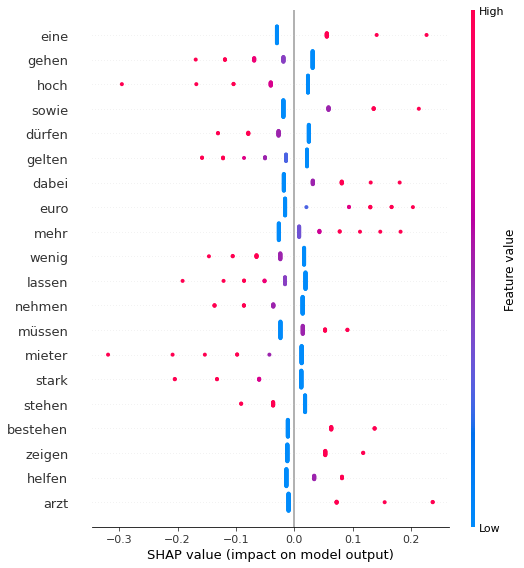

In [235]:
shap.summary_plot(shap_values, explain_set, feature_names=vectorizer.get_feature_names())

# rot/blau zeigt Feature Value, also rot=Feature ist da, blau=Feature ist nicht da

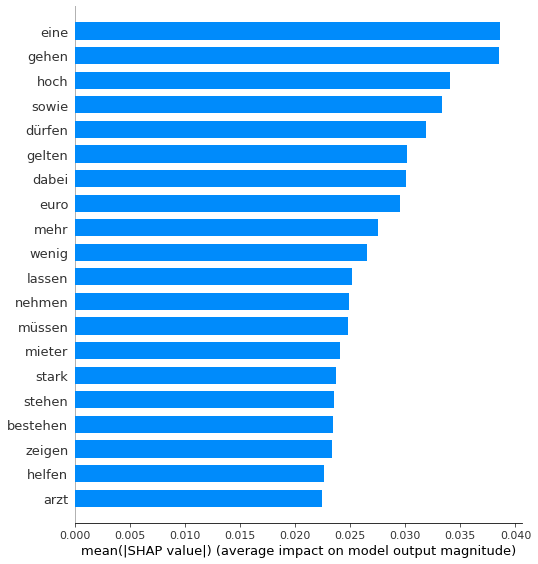

In [236]:
shap.summary_plot(shap_values, explain_set, plot_type="bar", feature_names=vectorizer.get_feature_names())

In [213]:
#shap.force_plot(explainer.expected_value, 
#                shap_values, 
#                explain_set, 
#                feature_names=vectorizer.get_feature_names())

# was zeigt das hier genau???

In [209]:
ind = 0
shap.force_plot(explainer.expected_value,
                shap_values[ind,:],
                explain_set[ind,:],
                feature_names=vectorizer.get_feature_names()
               )

In [78]:
explain_df.iloc[ind].titelH1

'Einschränkungen wegen Covid-19: Was Arbeitnehmer wissen müssen'

In [79]:
ind = 4
shap.force_plot(explainer.expected_value,
                shap_values[ind,:],
                explain_set[ind,:],
                feature_names=vectorizer.get_feature_names()
               )

In [210]:
explain_df.iloc[ind].titelH1

'Autohof oder Raststätte: Wohin bei Parkplatznot an der Autobahn?'

In [211]:
ind = 11
shap.force_plot(explainer.expected_value,
                shap_values[ind,:],
                explain_set[ind,:],
                feature_names=vectorizer.get_feature_names()
               )

In [212]:
explain_df.iloc[ind].titelH1

'Untervermietung: Das geht nur mit Erlaubnis des Vermieters'

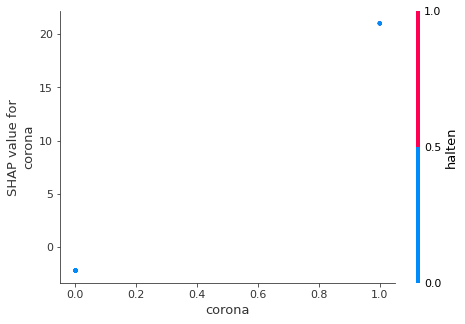

In [83]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("corona", shap_values, explain_set, feature_names=vectorizer.get_feature_names())